1. Припустимо, що Толя любить авокадо і вирішив подивитись динаміку цін на даний продукт у США. Є наступний набір даних від Hass Avocado Board 🥑:
Date - дата
AveragePrice - середня ціна одного авокадо
Total Volume - кількість проданих авокадо
4046 - кількість проданих авокадо PLU* 4046
4225 - кількість проданих авокадо PLU 4225
4770 - кількість проданих авокадо PLU 4770
Total Bags - всього упаковок
Small Bags - маленькі упаковки
Large Bags - великі
XLarge Bags - дуже великі
type - звичайний або органічний
year - рік
Region – місто або регіон the city or region of the observation
*PLU – код товару (Product Lookup code)
*У датафреймі знаходяться дані не за кожен день, а за кінець кожного тижня. Для кожної дати є кілька спостережень, що відрізняються за типом авокадо та регіоном продажу. Припустимо, що нас цей поділ не цікавить, тому в avocado_mean записані агреговані дані, де:
avocado_mean = pd.read_csv("path",
                            index_col=0, squeeze=True, parse_dates=['Date'])

                            Date
                            2015-01-04 1.301296
                            2015-01-11 1.370648
                            2015-01-18 1.391111
                            2015-01-25 1.397130
                            2015-02-01 1.247037
                            Name: AveragePrice, dtype: float64

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
avocado_mean_url = 'https://drive.google.com/file/d/1_VcXK2Yo7LFDspQ5mAJHRC506e7nhX_D/view?usp=sharing'
avocado_mean_path = 'https://drive.google.com/uc?id=' + avocado_mean_url.split('/')[-2]
avocado_mean = pd.read_csv(avocado_mean_path, parse_dates=['Date'])

In [3]:
avocado_mean.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


2. Порахуйте ковзну середню ціну авокадо (AveragePrice) з вікном рівним 3 (window). Чому дорівнює максимальне значення? Відповідь заокругліть до 2 знаків після точки.

In [4]:
avocado_mean \
            .AveragePrice \
            .rolling(window=3, min_periods=1) \
            .mean() \
            .max() \
            .round(2)

1.85

3. Окрім авокадо, Толя любить дивитися на графіки. Саме час побачити, як зміниться графік залежно від вибраного розміру вікна.
Ваше завдання — побудувати графіки ковзного середнього з різними значеннями параметра window (2, 4, 10, 50), подивитися на зміни та співвіднести наведені нижче зображення з відповідним значенням розміру вікна.
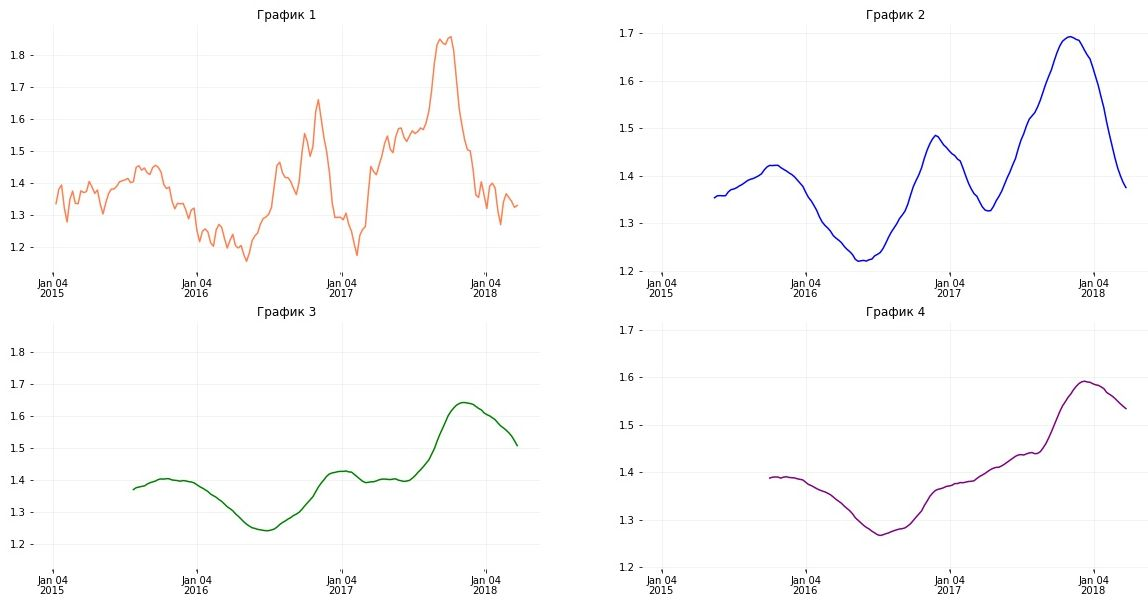

<AxesSubplot: >

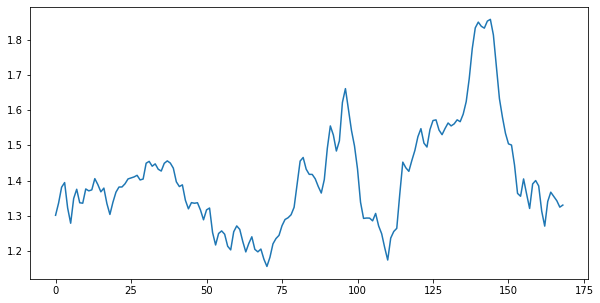

In [5]:
plt.figure(figsize=(10, 5))
avocado_mean.AveragePrice.rolling(window=2, min_periods=1).mean().plot.line()

<AxesSubplot: >

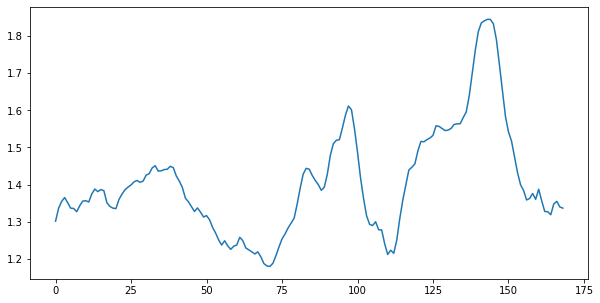

In [6]:
plt.figure(figsize=(10, 5))
avocado_mean.AveragePrice.rolling(window=4, min_periods=1).mean().plot.line()

<AxesSubplot: >

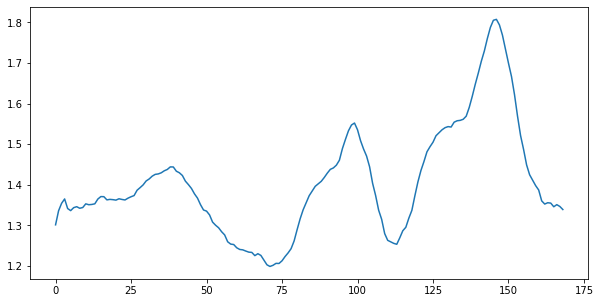

In [7]:
plt.figure(figsize=(10, 5))
avocado_mean.AveragePrice.rolling(window=10, min_periods=1).mean().plot.line()

<AxesSubplot: >

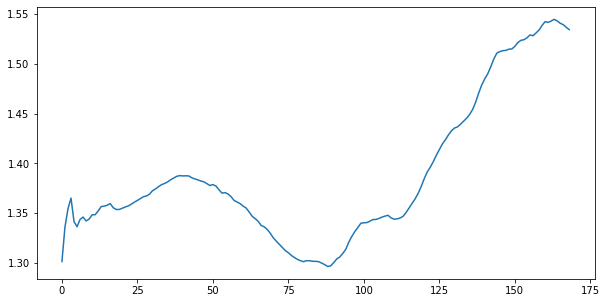

In [8]:
plt.figure(figsize=(10, 5))
avocado_mean.AveragePrice.rolling(window=50, min_periods=1).mean().plot.line()

In [9]:
avo_mean_2 = avocado_mean.rolling(2).mean()
avo_mean_4 = avocado_mean.rolling(4).mean()
avo_mean_10 = avocado_mean.rolling(10).mean()
avo_mean_50 = avocado_mean.rolling(50).mean()

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\36645662.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avo_mean_2 = avocado_mean.rolling(2).mean()
C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\36645662.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avo_mean_4 = avocado_mean.rolling(4).mean()
C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\36645662.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], 

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\2687078356.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avo_mean = avocado_mean.rolling(window).mean()
C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\2687078356.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avo_mean = avocado_mean.rolling(window).mean()
C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\2687078356.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Inde

Text(0.5, 1.0, 'avocado mean')

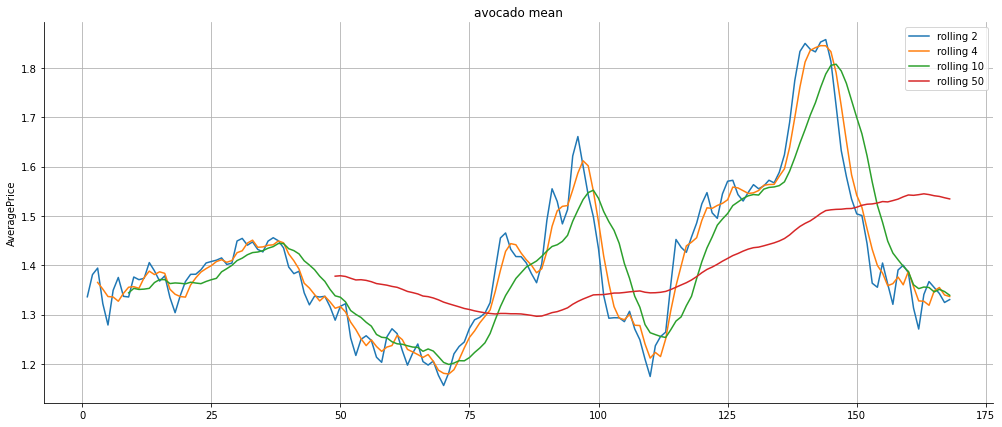

In [10]:
plt.figure(figsize=(17,7))

window=[2, 4, 10, 50]

for window in window:
    avo_mean = avocado_mean.rolling(window).mean()
    sns.lineplot(x=avo_mean.index, y=avo_mean.AveragePrice, label=f'rolling {window}')
    
plt.grid()
sns.despine()
plt.title('avocado mean')

# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])

    
# sns.lineplot(x=avo_mean_2.index, y=avo_mean_2.AveragePrice, label='avo_mean_2')
# sns.lineplot(x=avo_mean_4.index, y=avo_mean_4.AveragePrice, label='avo_mean_4')
# sns.lineplot(x=avo_mean_10.index, y=avo_mean_10.AveragePrice, label='avo_mean_10')
# sns.lineplot(x=avo_mean_50.index, y=avo_mean_50.AveragePrice, label='avo_mean_50')

4. ⭐️Завдання зі зірочкою!⭐️
Вивчіть параметри функцій:
- axis
- center
- closed
- min_periods
- on
- win_type
- window
у документації https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html і дайте характеристику кожній із перелічених вище.

- axis
- center
- closed
- min_periods
- on
- win_type
- window

5. ⭐️Завдання зі зірочкою!⭐️
Використовуйте агреговані дані avocado_mean.csv про ціни на авокадо та застосуйте функцію ewm() з параметром span=2, щоб отримати експоненційне ковзне середнє. Запишіть результат у avocado_ewm.

In [11]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\359542176.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  avocado_ewm = avocado_mean.ewm(span=2).mean()


In [12]:
avocado_ewm.head()

,AveragePrice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758


6. ⭐️Завдання зі зірочкою!⭐️
І ще одна степ, щоб закріпити матеріал. Імпортуйте повні дані avocado_full.csv (https://drive.google.com/file/d/1_9_D0obHj_RvlbW8z_gQcVjOcrFEXgd8/view?usp=sharing), вказавши index_col=0 (використовувати першу колонку як індекс).
Для авокадо типу organic (type) в Чикаго (region) порахуйте середнє ковзне з вікном 4 і експоненційне ковзне середнє з параметром span=4. Побудуйте графіки, а потім заповніть перепустки. Числа заокругліть до трьох символів після точки.

In [13]:
avocado_full_url = 'https://drive.google.com/file/d/1_9_D0obHj_RvlbW8z_gQcVjOcrFEXgd8/view?usp=sharing'
avocado_full_path = 'https://drive.google.com/uc?id=' + avocado_full_url.split('/')[-2]
avocado_full = pd.read_csv(avocado_full_path, parse_dates=['Date'], index_col=0)

In [14]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [15]:
avocado_full.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [16]:
avocado_full.columns = avocado_full.columns.str.replace(' ', '_').str.lower()
avocado_full.rename(columns={'averageprice': 'average_price'})

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [17]:
organic_chicago = avocado_full \
    .query('type == "organic" and region == "Chicago"') 

In [18]:
organic_chicago['rolling_price'] = organic_chicago.averageprice.rolling(window=4).mean().round(3)

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\3548722438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['rolling_price'] = organic_chicago.averageprice.rolling(window=4).mean().round(3)


In [19]:
organic_chicago['ewm_price'] = organic_chicago.averageprice.ewm(span=2).mean().round(3)

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_17312\580887906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['ewm_price'] = organic_chicago.averageprice.ewm(span=2).mean().round(3)


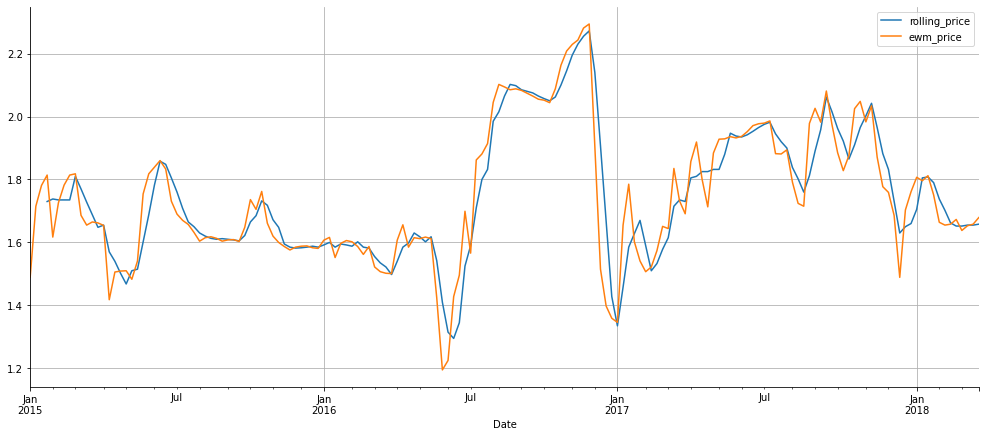

In [20]:
organic_chicago[['rolling_price','ewm_price']].plot(figsize=(17,7))

plt.grid()
sns.despine()

In [21]:
organic_chicago.loc['2016-08-21', ['rolling_price', 'ewm_price']]
# loc['значення'] Фільт за значенням у стовпці

rolling_price    2.102
ewm_price        2.085
Name: 2016-08-21 00:00:00, dtype: object

In [22]:
organic_chicago.loc['2017-02-19', ['rolling_price', 'ewm_price']]

rolling_price    1.533
ewm_price        1.574
Name: 2017-02-19 00:00:00, dtype: object

In [23]:
organic_chicago.loc['2017-01-01': '2017-02-01', ['rolling_price', 'ewm_price']]
# відбір за період

,rolling_price,ewm_price
Date,,
2017-01-01,1.335,1.346
2017-01-08,1.458,1.655
2017-01-15,1.585,1.785
2017-01-22,1.628,1.602
2017-01-29,1.670,1.541


7. 💀 Складне завдання! 💀
Далі працюватимемо з даними щодо запізнень у укладанні угод!
У файлі delays.csv (https://drive.google.com/file/d/1jpfGxaogG0D8jdnkbZPag7ljneJy8WCT/view?usp=sharing) знаходиться інформація про те, які компанії з ким і на яку суму укладали угоди, а найважливіше – наскільки вони при цьому запізнилися. Ось сабсет даних

  client_idcompany_id delay revenue
  0 2389 4240 -1 дні -14:57:48.000000000 705436
  1 7614 9544 -4 днів -02:14:23.000000000 859266
  2 2052 2427 -0 днів -06:08:57.000000000 812416
  3 9635 8054 -0 днів -23:40:19.000000000 162312
  4 8154 5503 -1 дні -13:21:53.000000000 658844

Спочатку давайте переведемо delay у timedelta формат. Зверніть увагу, що так просто стовпець не переведеться - потрібно буде прибрати. Збережіть дані в змінну df, відформатуйте колонку у потрібний спосіб (підказка - приберіть -) і переведіть її в тип timedelta.
Можуть знадобитися:
pd.to_timedelta()
pd.Series.str

In [24]:
delays_url = 'https://drive.google.com/file/d/1jpfGxaogG0D8jdnkbZPag7ljneJy8WCT/view?usp=sharing'
delays_path = 'https://drive.google.com/uc?id=' + delays_url.split('/')[-2]
delays = pd.read_csv(delays_path)

In [25]:
delays['delay'] = pd.to_timedelta(delays.delay.str.replace('-', ''))

In [26]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


8. Час це добре, але хотілося б розбити його на проміжки. Розбийте час на 3 інтервали та помістіть відповідні значення у колонку delay_categorical
Можуть знадобитися:
pd.cut()

In [27]:
delays['delay_categorical'] = pd.cut(delays.delay, bins=3)

In [28]:
delays.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


9. 💀 Складне завдання! 💀
Розбилося звичайно непогано, але хочеться трохи більші цілі значення і людські назви. У цьому допоможуть аргументи функції pd.cut! Перезадайте колонку delay_categorical, щоб значення в ній були
'less than 1 day' – час від 0 до 1 дня
'1-2 days' – від 1 до 2 днів
'2-3 days' – від 2 до 3 днів
'more than 3 days' – більше 3 днів
Наприклад, для наступного прикладу
client_id company_id delay revenue
14345 54631 2 дні 13:34:45 145345
54434 54834 1 день 08:26:00 453245
34905 49834 0 днів 00:26:03 14543
результатом буде
client_id company_id delay revenue delay_categorical
14345 54631 2 дні 13:34:45 145345 2-3 дні
54434 54834 1 день 08:26:00 453245 1-2 дні
34905 49834 0 днів 00:26:03 14543 less than 1 день
Можуть знадобитися:
pd.cut()
pd.to_timedelta()

In [29]:
delays.delay.max()

Timedelta('4 days 23:51:14')

In [30]:
bins = [pd.to_timedelta('0d')
       ,pd.to_timedelta('1d')
       ,pd.to_timedelta('2d')
       ,pd.to_timedelta('3d')
       ,pd.to_timedelta('100d')]

In [31]:
labes= ['less than 1 day'
        ,'1-2 days'
        ,'2-3 days'
        ,'more than 3 days']

In [32]:
delays['delay_categorical'] = pd.cut(delays.delay
                       ,bins=bins
                       ,labels=labes) 

In [33]:
delays.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


10. Тепер побудуйте інтерактивний барплот з тим, наскільки часто затримуються угоди, з'ясуйте найрідкісніший і найчастіший варіант.

In [34]:
delays_counts = pd.cut(delays.delay
                            ,bins=bins
                            ,labels=labes) \
                            .value_counts()

In [35]:
delays_counts

more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: delay, dtype: int64

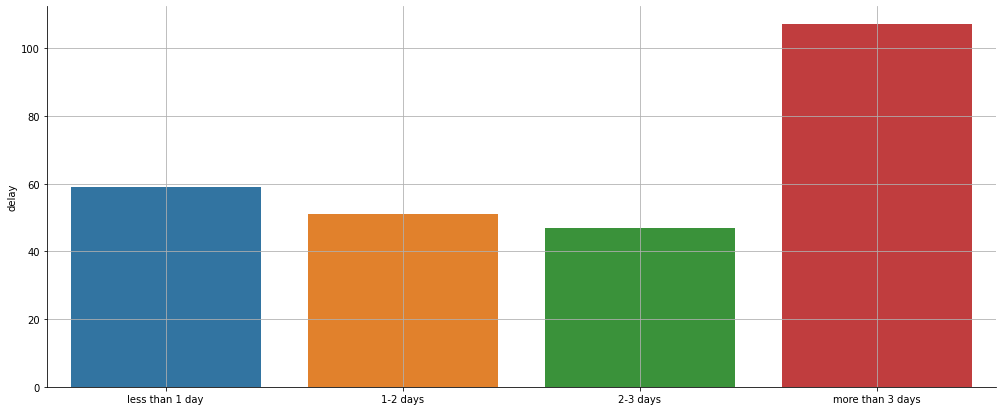

In [36]:
plt.figure(figsize=(17, 7))
sns.barplot(x=delays_counts.index, y=delays_counts)
plt.grid()
sns.despine()